<a href="https://colab.research.google.com/github/Pheobe-Sun/audio-and-speech-demo/blob/master/Instrument_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrument Classification
Can we train a classifier to recognise human vs. instrument sounds? Let's use two tracks of raw audio input and see if we can find features that differentiate the two classes (huamn vs. instrument).

*(This notebook is adapted from [here](https://musicinformationretrieval.com/neural_networks.html))*

## Load Data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
from librosa import display
import os
import glob
from IPython.display import Audio

In [3]:
#@markdown Load some data
%%capture
!wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav
!wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/87778__marcgascon7__vocals.wav

In [4]:
y_trumpet_train, sr_trumpet = librosa.load('170255__dublie__trumpet.wav', duration=6)
y_vocal_train, sr_vocal = librosa.load('87778__marcgascon7__vocals.wav', duration=6)
y_trumpet_test, _ = librosa.load('170255__dublie__trumpet.wav', duration=2.7, offset=6)
y_vocal_test, _ = librosa.load('87778__marcgascon7__vocals.wav', duration=1.9, offset=6)
print(f'trumpet_train')
print(f'Data dimension: {y_trumpet_train.shape}')
print(f'Sampling rate is: {sr_trumpet}')
print(f'Duration: {librosa.get_duration(y_trumpet_train, sr_trumpet):.3}s')
print(f'\nvocal_train')
print(f'Data dimension: {y_vocal_train.shape}')
print(f'Sampling rate is: {sr_vocal}')
print(f'Duration: {librosa.get_duration(y_vocal_train, sr_vocal):.3}s')
print(f'\ntrumpet_test')
print(f'Data dimension: {y_trumpet_test.shape}')
print(f'Duration: {librosa.get_duration(y_trumpet_test, sr_trumpet):.3}s')
print(f'\nvocal_test')
print(f'Data dimension: {y_vocal_test.shape}')
print(f'Duration: {librosa.get_duration(y_vocal_test, sr_vocal):.3}s')

trumpet_train
Data dimension: (132300,)
Sampling rate is: 22050
Duration: 6.0s

vocal_train
Data dimension: (132300,)
Sampling rate is: 22050
Duration: 6.0s

trumpet_test
Data dimension: (59535,)
Duration: 2.7s

vocal_test
Data dimension: (41895,)
Duration: 1.9s


In [5]:
# Play back vocal
Audio(data=y_vocal_train, rate=sr_vocal)

In [6]:
# Play back trumpet
Audio(data=y_trumpet_train, rate=sr_trumpet)

## Feature Extraction: MFCC

In [8]:
n_mfcc = 12

mfcc_trumpet_train = librosa.feature.mfcc(y_trumpet_train, sr=sr_trumpet, n_mfcc=n_mfcc).T # Transpose the output to make it (n_samples, n_features)
mfcc_vocal_train = librosa.feature.mfcc(y_vocal_train, sr=sr_vocal, n_mfcc=n_mfcc).T

print(mfcc_trumpet_train.shape)
print(mfcc_vocal_train.shape)

# assert mfcc_vocal.shape[1] == 12, 'dimension error'

(259, 12)
(259, 12)


In [13]:
print('Mean:')
print(mfcc_trumpet_train.mean(axis=0))
print(mfcc_vocal_train.mean(axis=0))
print('\nStandard deviation:')
print(mfcc_trumpet_train.std(axis=0))
print(mfcc_vocal_train.std(axis=0))
print('\nMax:')
print(mfcc_trumpet_train.max(axis=0))
print(mfcc_vocal_train.max(axis=0))
print('\nMin:')
print(mfcc_trumpet_train.min(axis=0))
print(mfcc_vocal_train.min(axis=0))

Mean:
[-274.55222   163.56664   -86.21091     8.620581  -34.127      -9.096648
  -20.963945  -11.162995  -13.625258  -18.965948  -10.795123  -10.384592]
[-339.7287      138.03328      36.495274      6.387123     24.571264
   18.645071     -9.873051      9.35597       7.5704274     0.64173275
    9.345106      8.628015  ]

Standard deviation:
[50.071865  32.594696  14.968514  13.212797   8.106875   6.521976
  6.901743   7.0387573  4.8409004  6.263919   5.17365    4.513314 ]
[111.060776   30.0578     17.556646   28.262703   15.109122   13.268053
  18.743269    9.716538    6.3978105   9.597257   10.587851    5.7495165]

Max:
[-2.0815164e+02  2.3054144e+02 -4.7120102e+01  4.3095375e+01
  5.0665007e+00  7.2855487e+00  9.9884057e-01  4.9522471e+00
 -9.8826647e-02  1.4346941e+00  3.7029617e+00  3.0692179e+00]
[-76.61801  171.88834   79.663734  75.31847   53.220833  53.643936
  12.955603  33.331116  26.798216  15.70664   38.515713  22.374609]

Min:
[-394.23456    77.86177  -110.533195  -30.138

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(mfcc_trumpet_train) # Using trumpet's data to fit the scaler
scaled_mfcc_trumpet_train = scaler.transform(mfcc_trumpet_train)
scaled_mfcc_vocal_train = scaler.transform(mfcc_vocal_train)

In [15]:
print(scaled_mfcc_trumpet_train.mean(axis=0))
print(scaled_mfcc_trumpet_train.std(axis=0))

# the vocal data is scaled according to the range of trumpet
# thus the std is not exactly of unit variance
print(scaled_mfcc_vocal_train.mean(axis=0)) 
print(scaled_mfcc_vocal_train.std(axis=0)) 

[-9.2053503e-09  0.0000000e+00  9.2053504e-10  1.1046421e-08
  7.3642803e-09  0.0000000e+00 -2.2092841e-08  3.6821401e-09
  1.4728561e-08  7.3642803e-09  5.5232103e-09  0.0000000e+00]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-1.3016584  -0.7833591   8.19762    -0.16903749  7.2405534   4.2535753
  1.6069696   2.9151406   4.3784595   3.130258    3.8928473   4.2125607 ]
[2.2180274  0.92216843 1.1729051  2.13904    1.8637416  2.034361
 2.7157297  1.3804337  1.3216158  1.532149   2.0464954  1.2739015 ]


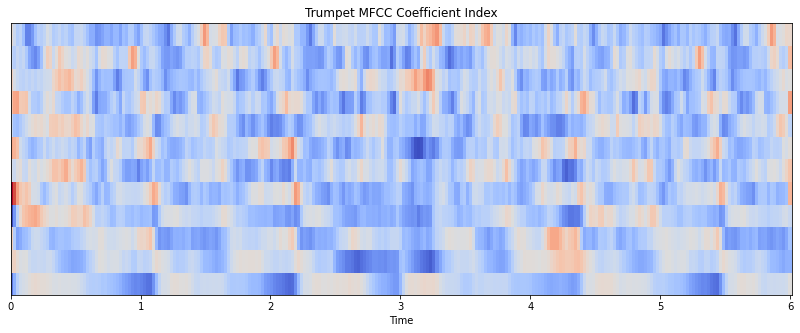

In [20]:
plt.figure(figsize=(14,5))
librosa.display.specshow(scaled_mfcc_trumpet_train.T, sr=sr_trumpet, x_axis='time')
plt.title('Trumpet MFCC Coefficient Index')
plt.show()

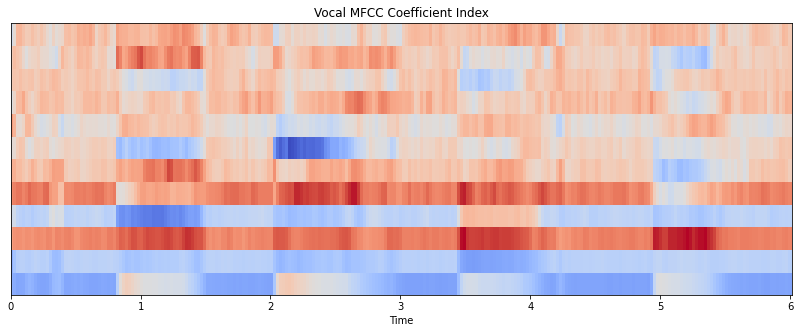

In [21]:
plt.figure(figsize=(14,5))
librosa.display.specshow(scaled_mfcc_vocal_train.T, sr=sr_vocal, x_axis='time')
plt.title('Vocal MFCC Coefficient Index')
plt.show()

## Preparing for training data

In [22]:
features = np.vstack((scaled_mfcc_trumpet_train, scaled_mfcc_vocal_train))
assert features.shape[1] == 12, 'Shape Error'
print(features.shape)

(518, 12)


In [23]:
# preparing an array of targets/labels/Y
# where trumpet = 0 and vocal = 1
labels = np.concatenate((np.zeros(len(scaled_mfcc_trumpet_train)), np.ones(len(scaled_mfcc_vocal_train)))) 
assert len(labels) == len(features), 'Dimension Error'
print(labels.shape)
print(labels[:10])

(518,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Building a classifier

Fitting a classifier

In [24]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(features, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Preparing for test data

In [25]:
mfcc_trumpet_test = librosa.feature.mfcc(y_trumpet_test, sr=sr_trumpet, n_mfcc=n_mfcc).T
mfcc_vocal_test = librosa.feature.mfcc(y_vocal_test, sr=sr_vocal, n_mfcc=n_mfcc).T
assert mfcc_trumpet_test.shape[1] == 12
assert mfcc_vocal_test.shape[1] == 12

features_test_raw = np.vstack((mfcc_trumpet_test, mfcc_vocal_test))
features_test = scaler.transform(features_test_raw)
print(features_test.shape)
print(features_test.std(axis=0))

(199, 12)
[1.4804523 0.994863  4.3440275 0.8607141 4.1453414 2.0122373 1.9732251
 1.3541477 2.6170743 2.0171187 1.802435  2.378563 ]


In [26]:
targets = np.concatenate((np.zeros(len(mfcc_trumpet_test)), np.ones(len(mfcc_vocal_test))))
assert len(targets) == len(features_test), 'Dimension Error'
print(targets.shape)

(199,)


Running a classifier

In [27]:
predicted = svm.predict(features_test)
svm.score(features_test, targets)

1.0